In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from simulation import data
import pandas
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

In [2]:
from player_dicts import *

In [3]:
#get player data from result page
DATA = data.parse(PLAYER_ID)

|==============================| 100% | Done!


In [4]:
#define the lanes for the CUP system
lanes_e = [ 'E'+str(i) for i in [1,3,4,5,12,13,14,16,17 ]]
lanes_f = [ 'F'+str(i) for i in [2,4,7,8,12,13,15,17,18]]
LANES = [*lanes_e,*lanes_f]
LANES_ALL = [*[ 'E'+str(i+1) for i in range(18)],
             *[ 'F'+str(i+1) for i in range(18)]]
print(LANES_ALL)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18']


In [6]:
from simulation.matchplay import gen_Cup_16
from simulation.matchplay import gen_Cup_32
#MC simulation
n_MC = 10000
medals_w = [x.medals for x in gen_Cup_16(RANK_W,DATA,LANES,n_MC) ]
medals_m = [x.medals for x in gen_Cup_32(RANK_M,DATA,LANES,n_MC) ]

In [7]:
#Plot function for the most common winners
def plot_most_common(medals,n_top=10):
    winners = [x[0] for x in medals]
    letter_counts = Counter(winners)
    dtf = pandas.Series(OrderedDict(letter_counts.most_common(n_top))).plot(kind='bar')
    return dtf

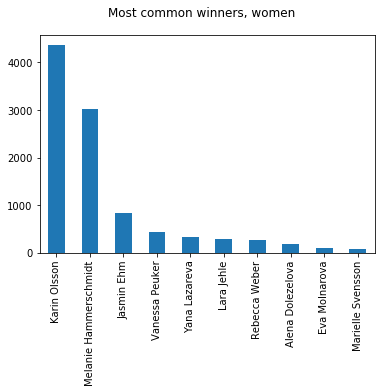

In [8]:
dtf = plot_most_common(medals_w)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Most common winners, women')
fig.savefig('../FIG/winners_w',bbox_inches = 'tight')

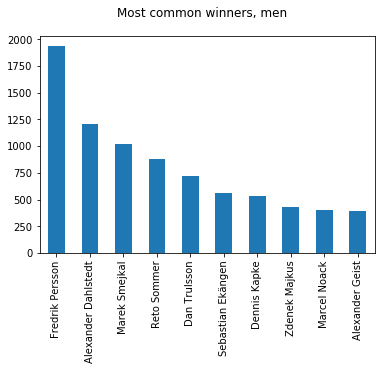

In [9]:
dtf = plot_most_common(medals_m)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Most common winners, men')
fig.savefig('../FIG/winners_m',bbox_inches = 'tight')

In [10]:
from simulation.game import Game_lanelog
score = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES).score
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES).lanelog
print(score)
print(lanelog)

[5, 1]
[-1, 0, 0, -1, 0, 1, -1, -1, -1, 0, 1, 1, 1, 0, 1, 1, 0, 0]


In [24]:
from simulation.matchfuncs import getRandom
from simulation.matchfuncs import getMean
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES_ALL,getRandom).lanelog
print(lanelog)
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES_ALL,getRandom).lanelog
print(lanelog)

[-1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, -1, -1, -1, 0, 1, 0, 0, 0, 0, -1, 1, 1, -1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, -1, -1, -1, -1, 0, 1, 0, -1, 0, -1, 1, 0, 0, 1, 0, 0, 0]


In [23]:
from simulation.matchfuncs import getRandom
from simulation.matchfuncs import getMean
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES_ALL,getMean).lanelog
print(lanelog)
lanelog  = Game_lanelog('Fredrik Persson','Reto Sommer','E1',DATA,LANES_ALL,getMean).lanelog
print(lanelog)

[0, 0, 0, 0, -1, 0, -1, 0, 1, 0, 0, -1, 1, 1, -1, -1, 0, 0, 0, -1, -1, 1, 0, 1, 0, 1, -1, -1, 0, 1, 1, 1, 1, -1, -1, 0]
[0, 0, 0, 0, -1, 0, -1, 0, 1, 0, 0, -1, 1, 1, -1, -1, 0, 0, 0, -1, -1, 1, 0, 1, 0, 1, -1, -1, 0, 1, 1, 1, 1, -1, -1, 0]


In [28]:
def getresdict(lanes):
    resdict = dict()
    for lane in lanes:
        resdict[lane] = 0
    return resdict
    
def addGame(p1,p2,lanes, resdict,resfunc):
    for i,el in enumerate( Game_lanelog(p1,p2,'E1',DATA,lanes,resfunc).lanelog):
        resdict[lanes[i]] = resdict[lanes[i]] + el 
    return resdict
    
import operator                             #Importing operator module
def plotSortedLanes(res_all):
    dc_sort = sorted(res_all.items(),key = operator.itemgetter(1),reverse = True)
    keys = [v[0] for v in dc_sort]
    vals = [v[1] for v in dc_sort]

    plt.figure(figsize=(13,5))
    barlist = plt.bar(range(len(vals)), vals, align='center')
    plt.xticks(range(len(vals)), keys)
    for i,el in enumerate(keys):
        try:
            LANES.index(el)
            barlist[i].set_color('r')
        except:
            pass
        

In [31]:
import numpy as np
names_m = [v for v in RANK_M.values()]
names_w = [v for v in RANK_W.values()]
np.random.choice(names_m)

'Sebastian Piekorz'

In [79]:
def plotHighestScores(scores,lambda_f, n_plot):
    top_dict = OrderedDict()
    for el in sorted(scores.items(),
                     key = lambda_f,reverse = True)[:10]:
        top_dict[el[0]] = lambda_f(el)
    dtf = pandas.Series(top_dict).plot(kind='bar')
    return dtf

def get_lane_scores_mean(p1,names):
    res_all = getresdict(LANES_ALL)
    match_count = 0
    for p2 in names:
        if (p1 != p2):
            match_count = match_count+1
            res_all = addGame(p1,p2,LANES_ALL,res_all,getMean)
    return res_all, match_count

def get_lane_scores_mc(p1,names):
    res_all = getresdict(LANES_ALL)
    match_count = 0
    for _ in range(1000):
        p2 = np.random.choice(names)
        if (p1 != p2):
            match_count = match_count+1
            res_all = addGame(p1,p2,LANES_ALL,res_all,getRandom)
    return res_all,match_count
    

def getnormscoresdict(names):
    norm_scores = dict()
    for n in names:
        lane_scores = get_lane_scores(n,names)
        norm_scores[n] = (get_normalized_score(lane_scores,LANES), 
                          get_normalized_score(lane_scores,LANES_ALL) )
    
        print(n,norm_scores[n])
    return norm_scores

In [80]:
def get_normalized_score(result, lanes):
    count = 0
    score = 0
    for el in lanes:
        #print(el)
        count = count + abs(result[el])
        score = score + result[el]
    return (score/count)

def score_from_lanes(scores):
    return (np.sum(np.array(scores)>0),
            np.sum(np.array(scores)<0))


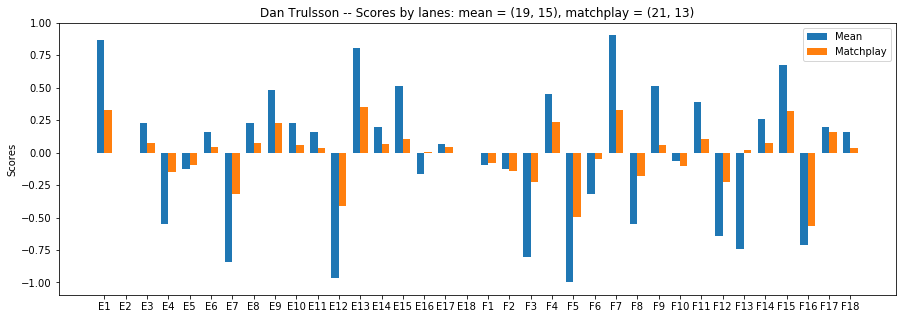

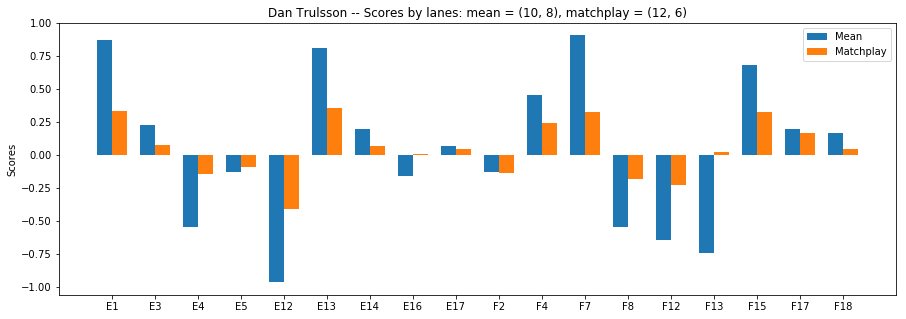

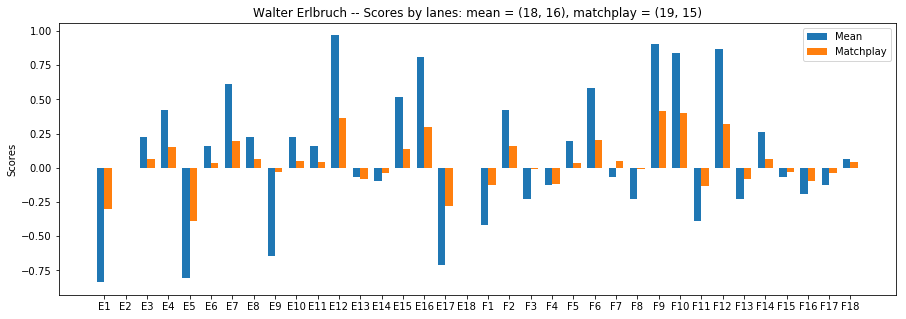

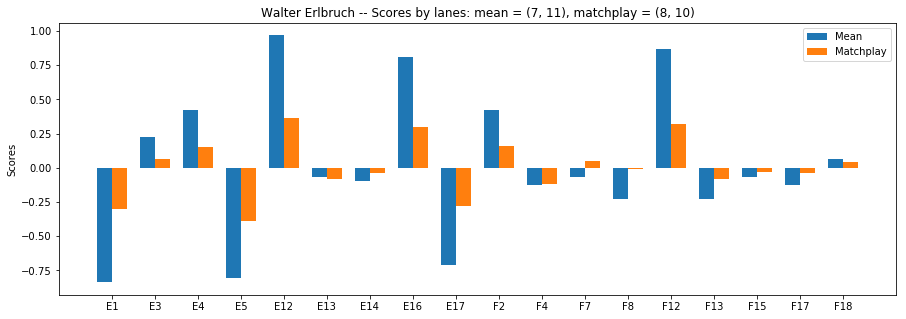

In [155]:
def plotLaneBarPlot(res_mean, count_mean,
                    res_mc, count_mc,
                    p1,lanes):
    ind = np.arange(len(lanes))  # the x locations for the groups
    bins_mean = [ res_mean[l]/count_mean for l in lanes]
    bins_mc = [ res_mc[l]/count_mc for l in lanes]

    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    rects1 = ax.bar(ind, bins_mean, width)
    rects2 = ax.bar(ind + width, bins_mc, width)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Scores')
    ax.set_title('{} -- Scores by lanes: mean = {}, matchplay = {}'.
                format(p1,score_from_lanes(bins_mean),
                       score_from_lanes(bins_mc)))
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(lanes)

    ax.legend((rects1[0], rects2[0]), ('Mean', 'Matchplay'))

    
    plt.show()
    return fig

def plotLaneBarPlots(p1,names):
    res_mean, count_mean = get_lane_scores_mean(p1, names)
    res_mc, count_mc = get_lane_scores_mc(p1, names)
    
    fig = plotLaneBarPlot(res_mean, count_mean,
                    res_mc, count_mc,
                    p1,LANES_ALL)
    fig.savefig('../FIG/lanes_all_{}'.format(p1),bbox_inches = 'tight')  
    
    fig = plotLaneBarPlot(res_mean, count_mean,
                    res_mc, count_mc,
                    p1,LANES)
    
    fig.savefig('../FIG/lanes_cup_{}'.format(p1),bbox_inches = 'tight')

        

    

p1 = 'Dan Trulsson'
plotLaneBarPlots(p1,names_m)
p1 = 'Walter Erlbruch'
plotLaneBarPlots(p1,names_m)



In [96]:
print(sum(bins_mean))
print(sum(bins_mc))

-0.22580645161290316
-0.31752577319587644


In [39]:
#norm_scores_w = getnormscoresdict(names_w)
#norm_scores_m = getnormscoresdict(names_m)

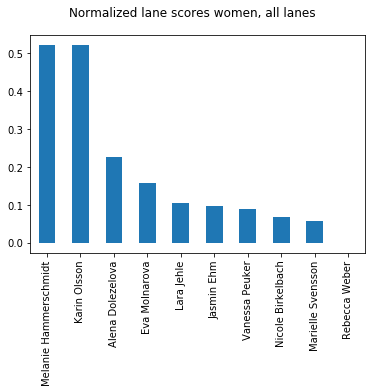

In [310]:
dtf = plotHighestScores(norm_scores_w,lambda x: x[1][1], 10)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores women, all lanes')
fig.savefig('../FIG/lanescores_w_all',bbox_inches = 'tight')

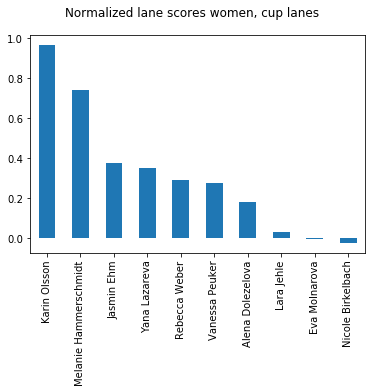

In [311]:
dtf = plotHighestScores(norm_scores_w,lambda x: x[1][0], 10)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores women, cup lanes')
fig.savefig('../FIG/lanescores_w_cup',bbox_inches = 'tight')

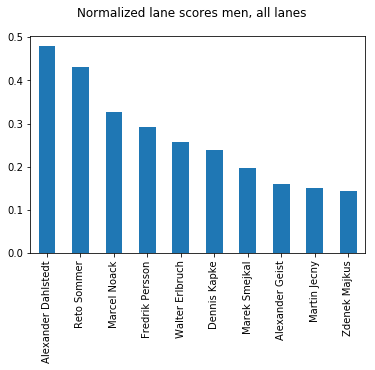

In [312]:
dtf = plotHighestScores(norm_scores_m,lambda x: x[1][1], 10)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores men, all lanes')
fig.savefig('../FIG/lanescores_m_all',bbox_inches = 'tight')

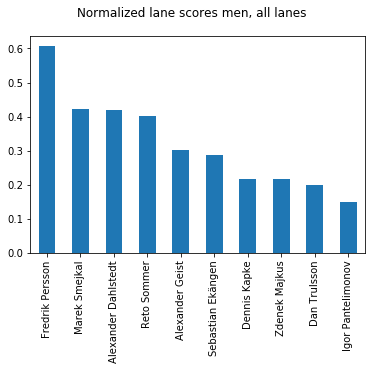

In [313]:
dtf = plotHighestScores(norm_scores_m,lambda x: x[1][0], 10)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores men, all lanes')
fig.savefig('../FIG/lanescores_m_cup',bbox_inches = 'tight')

In [ ]:
def plotEndsScores(scores,lambda_f, n_plot):
    top_dict = OrderedDict()
    sorted_scores = sorted(scores.items(),
                     key = lambda_f,reverse = True)
    for el in sorted_scores[:n_plot]+sorted_scores[-n_plot:]:
        top_dict[el[0]] = lambda_f(el)
    dtf = pandas.Series(top_dict).plot(kind='bar')
    return dtf

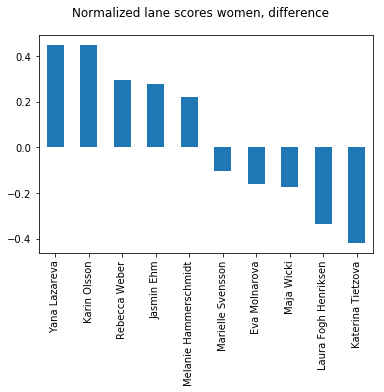

In [329]:
dtf = plotEndsScores(norm_scores_w,lambda x: x[1][0]-x[1][1], 5)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores women, difference')
fig.savefig('../FIG/lanescores_w_diff',bbox_inches = 'tight')

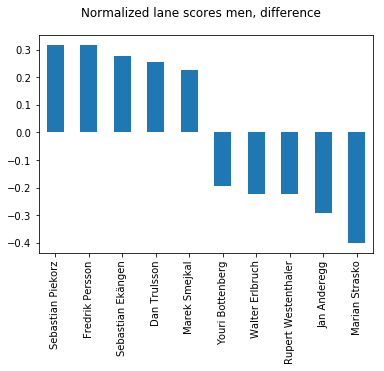

In [327]:
dtf = plotEndsScores(norm_scores_m,lambda x: x[1][0]-x[1][1], 5)
dtf.plot()
fig = plt.gcf()
fig.suptitle('Normalized lane scores men, difference')
fig.savefig('../FIG/lanescores_m_diff',bbox_inches = 'tight')

In [323]:
x = [x for x in range(10)]
print(x)
print(x[:3])
print(x[:3]+x[-3:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2]
[0, 1, 2, 7, 8, 9]


0.6111731843575419
0.29573984776630935


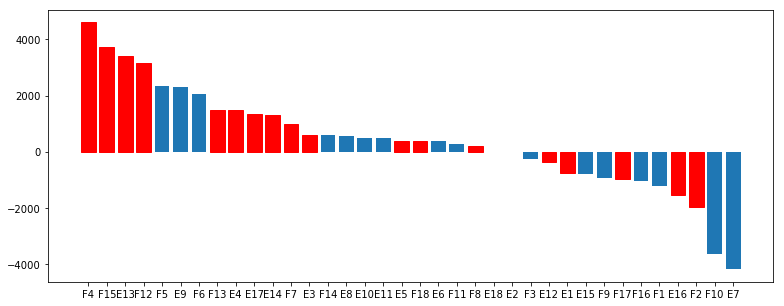

In [232]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Fredrik Persson'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

0.2288929361259269
-0.051334629031970475


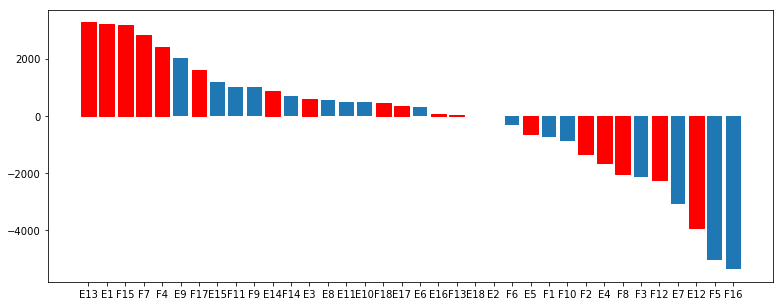

In [233]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Dan Trulsson'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

0.41559009420837145
0.19804622133779567


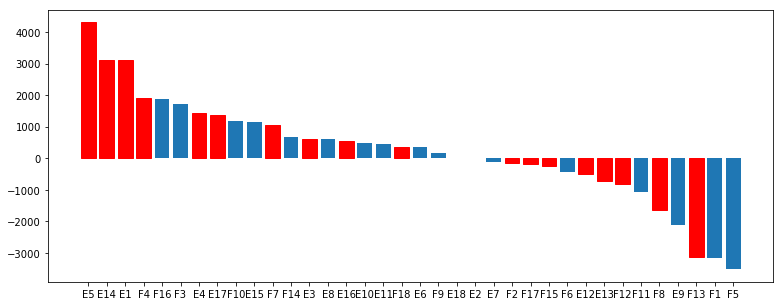

In [234]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Marek Smejkal'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

-0.1294559099437148
-0.014637656460073093


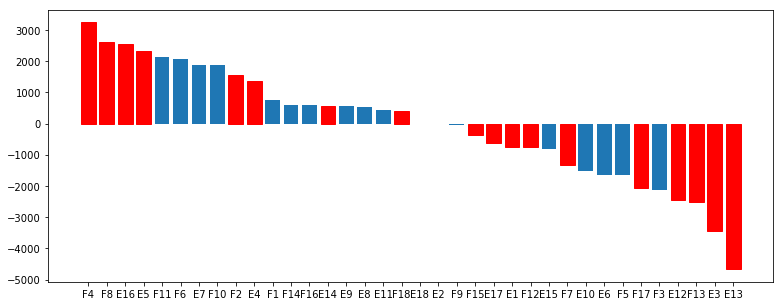

In [235]:
res_all = getresdict(LANES_ALL)
for _ in range(10000):
    p1 = 'Christian Gobetz'    
    p2 = np.random.choice(names)
    if (p1 != p2):
        res_all = addGame(p1,p2,LANES_ALL,res_all)
    
plotSortedLanes(res_all)
print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))

In [222]:


print(get_normalized_score(res_all,LANES))
print(get_normalized_score(res_all,LANES_ALL))
    

-0.2506475613116561
-0.10542790069004766
